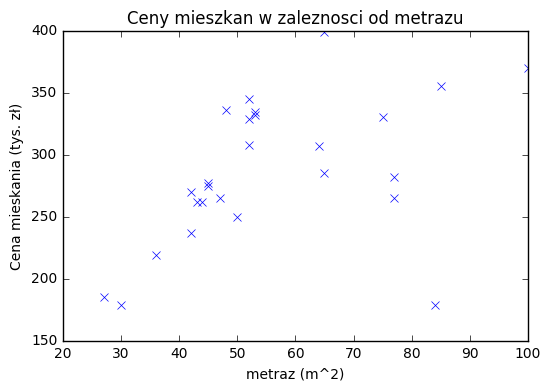

Wyznaczone wartości wag -> w0: 0.0 w1: 0.0


In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_regression 

sizes = np.loadtxt('/home/dawid/git/machine_learning_for_students/flat.areas').reshape((26,1))
prices = np.loadtxt('/home/dawid/git/machine_learning_for_students/flat.prices').reshape((26,1))
samples_cnt = len(prices)
weight0 = 0.0
weight1 = 0.0
learning_rate = 0.0001
maxIteration = 100000

for i in range(maxIteration):
    weight0 = weight0
    weight1 = weight1
    
    #Zadanie1: 
    predicted_prices = []
    #uzupełnij listę predicted_prices tak, aby dla każdego metrazu budynku z listy 'sizes' wyznaczyć cenę tegoż
    #budynku przy użyciu aktualnych wag modelu liniowego
    
    #Zadanie2:
    #napisz kod, który iteracyjnie poprawiać będzie wagi tak, aby ostatecznie wyznaczyły prostą,
    #która najlepiej odwzoruje zależność metraż -> cena
    

plt.plot(sizes, prices, "x")
if len(predicted_prices) > 0:
    plt.plot(sizes, predicted_prices, "r-")
plt.title('Ceny mieszkan w zaleznosci od metrazu')
plt.xlabel('metraz (m^2)')
plt.ylabel('Cena mieskania (tys. zł)')
plt.show()
print("Wyznaczone wartości wag -> w0:", weight0, "w1:", weight1)

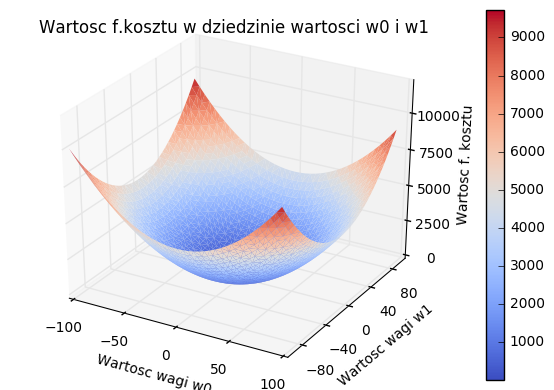

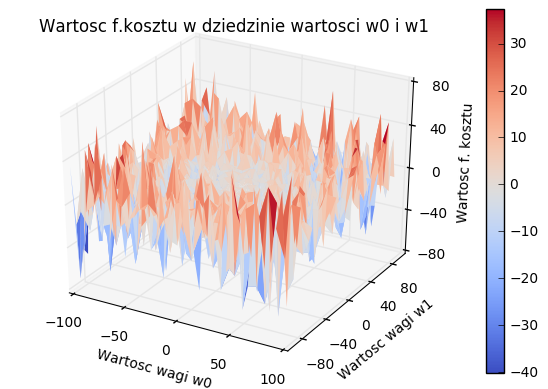

In [21]:
from helpers import visualize_cost_function
import numpy as np

def loss_function(sizes, prices, weight0, weight1):
    predictions = [weight0 + weight1*sizes[i] for i in range(len(prices))]
    return sum([(predictions[i] - prices[i])**2 for i in range(len(prices))])/(2*len(prices))


def loss_function2(sizes, prices, weight0, weight1):
    predictions = [weight0 + weight1*sizes[i] for i in range(len(prices))]
    return sum([(np.sin(predictions[i]/prices[i]**2) * (predictions[i]*prices[i]**3)) for i in range(len(prices))])/(2*len(prices))


#Poniższy kod wyznacza wartości funkcji kosztu w dziedzinie wartości atrybutów w0 i w1
w0_values = np.arange(-10, 10, 0.5)
w1_values = np.arange(-10, 10, 0.5)

sizes_transformed = (sizes - np.mean(sizes)) / np.std(sizes)
prices_transformed = (prices - np.mean(prices)) / np.std(prices)

w0_values = np.arange(-100, 100, 5)
w1_values = np.arange(-100, 100, 5)

visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function)
visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function2)

#Zad 3
#Po wykonaniu tego fragmentu kodu zobaczysz wizualizacje dwóch różnych funkcji kosztu. 
#Pierwsza z nich obrazuje błąd średniokwadratowy, druga - jakąś arbitralnie wybraną funkcję
#Zastanów się, dlaczego używa się często tej pierwszej, a nie np. drugiej funkcji

